# Decision trees: Problem solving

We previously looked at predicting whether or not  a candy is popular based on its other properties using logistic regression.

This gave us an idea of how  different properties **add** together to make a candy popular, but it didn't give us as much of an idea of how the properties act on each other.

In this session, you will predict whether or not is popular using decision trees.

This dataset [was collected](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) to discover the most popular Halloween candy.

| Variable         | Type              | Description                                                  |
|:-----------------|:------------------|:--------------------------------------------------------------|
| chocolate        | Numeric (binary)  | Does it contain chocolate?                                   |
| fruity           | Numeric (binary)  | Is it fruit flavored?                                        |
| caramel          | Numeric (binary)  | Is there caramel in the candy?                               |
| peanutalmondy    | Numeric (binary)  | Does it contain peanuts, peanut butter or almonds?           |
| nougat           | Numeric (binary)  | Does it contain nougat?                                      |
| crispedricewafer | Numeric (binary)  | Does it contain crisped rice, wafers, or a cookie component? |
| hard             | Numeric (binary)  | Is it a hard candy?                                          |
| bar              | Numeric (binary)  | Is it a candy bar?                                           |
| pluribus         | Numeric (binary)  | Is it one of many candies in a bag or box?                   |
| sugarpercent     | Numeric (0 to 1)  | The percentile of sugar it falls under within the data set.  |
| pricepercent     | Numeric (0 to 1)  | The unit price percentile compared to the rest of the set.   |
| winpercent       | Numeric (percent) | The overall win percentage according to 269,000 matchups     |
| popular | Numeric (binary) | 1 if win percentage is over 50% and 0 otherwise |

**Acknowledgements:**

This dataset is Copyright (c) 2014 ESPN Internet Ventures and distributed under an MIT license.

## Load the data

First import `pandas`.

In [49]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="importAs" id="^+Nghe{{_uq{G7tc)sr/" x="130" y="233"><field name="libraryName">pandas</field><field name="libraryAlias" id="lfN=$uzFcxs-6^)2j+oc">pd</field></block></xml>

Load a dataframe with `"datasets/candy-data.csv"` but use `index_col="competitorname"` to make `competitorname` an ID instead of a variable.
Then display the dataframe.

In [50]:
dataframe = pd.read_csv('datasets/candy-data.csv', index_col="competitorname")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`" x="80" y="398"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="TrI}GSSE8V$xub^riM5u"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/candy-data.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="T!2=Rsgm?2MK$m(1gSoc"><field name="CODE">index_col="competitorname"</field></block></value></block></value></block></value></block><block type="variables_get" id="QrXVu@{ddyF~%Ex(x?D+" x="77" y="525"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0


## Explore the data

Since this is a dataset you've looked at before, just make a correlation heatmap to show how the variables are related to each other.

Start by importing `plotly.express`.

In [51]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

And create and show the heatmap figure in one line.

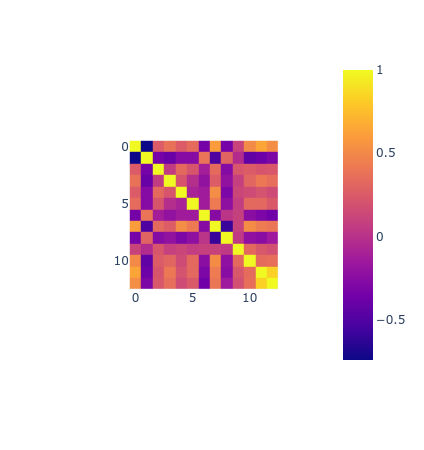

In [52]:
px.imshow(dataframe.corr())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF" x="9" y="390"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="INPUT"><block type="lists_create_with" id="g^2EaX(wo6etoMYs:5}O"><mutation items="1"></mutation><value name="ADD0"><block type="varDoMethod" id="?iaY9MJ88^K?_+|.(F,c"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block></value></block></xml>

----------------------------
**QUESTION:**

Look at the first two columns.
What variables do these correspond to?

**ANSWER: (click here to edit)**

*Chocolate and fruity*

----------------------------

**QUESTION:**

How would you decribe their pattern of correlation with other variables?

**ANSWER: (click here to edit)**

*They appear to correlate with other variables in opposite ways: where one is positive, the other is negative*

----------------------------

## Prepare train/test sets

You need to split the dataframe into training data and testing data, and also separate the predictors from the class labels.

Start by dropping the label, `popular`, and its counterpart, `winpercent`, to make a new dataframe called `X`.

In [53]:
X = dataframe.drop(columns=["popular","winpercent"])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="j12HEn?u}2$P-S)Ax6d(" x="-16" y="265"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field><value name="VALUE"><block type="varDoMethod" id="PMH^/O2y?rD(Y}r-N6eY"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="bGn#S3b1DV-0-egwl87D"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="8N-YF(7ms%)oox.~Z;b/"><field name="CODE">columns=["popular","winpercent"]</field></block></value></block></value></block></value></block><block type="variables_get" id="*Q(nsPMh9xg`HceqC3eN" x="-11" y="350"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></xml>

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116
Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116
WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313


Save a dataframe with just `popular` in `Y`.

In [54]:
Y = dataframe[['popular']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="_:J1([xryT4i+F7k{#[%" x="17" y="175"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field><value name="VALUE"><block type="indexer" id="22hOF=T:mHvJrMybHkPs"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="INDEX"><block type="lists_create_with" id="qT2G_{7q~*L;[5j:vtKq"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="=UVLwuCW$1d9ZJ]6HF_,"><field name="TEXT">popular</field></block></value></block></value></block></value></block><block type="variables_get" id="pog__n6Jf{VK_sNEB)B$" x="17" y="239"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></xml>

,popular
competitorname,
100 Grand,1
3 Musketeers,1
One dime,0
One quarter,0
Air Heads,1
...,...
Twizzlers,0
Warheads,0
WelchÕs Fruit Snacks,0


Import `sklean.model_selection` to split `X` and `Y` into train and test sets.

In [55]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits. Use `random_state=1` so we all get the same answer

In [56]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

## Decision tree model

First import `sklearn.tree`.

In [57]:
import sklearn.tree as tree

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="importAs" id="?`a/SEo[mr`kFXR@l=`@" x="16" y="10"><field name="libraryName">sklearn.tree</field><field name="libraryAlias" id="tkeU~z;dQ]^6[?rbF?)9">tree</field></block></xml>

Now create the decision tree model

In [58]:
decisionTree = tree.DecisionTreeClassifier()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable></variables><block type="variables_set" id="0{MIimjRn(`+`5M$0_U7" x="-90" y="132"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><value name="VALUE"><block type="varCreateObject" id="?`dwaKnOBjnrd}`doxhF"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">DecisionTreeClassifier</field><data>tree:DecisionTreeClassifier</data></block></value></block></xml>

----------------------------
**QUESTION:**

Why don't we need to scale anything?

**ANSWER: (click here to edit)**

*Scaling doesn't matter for decision trees like it does for regression.
In regression, each feature's contributions are added to the others, so people like to scale to make the coefficients for each feature more directly comparable.
There is no equivalent concept in decision trees; in fact, it is probably more confusing to scale variables in decision trees.*

----------------------------

Fit the model and get predictions.

In [59]:

decisionTree.fit(splits[0], splits[2])

predictions = decisionTree.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="qQx0AB#ks`Cf5xjKlwxo" x="20" y="129"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><field name="MEMBER">fit</field><data>decisionTree:fit</data><value name="INPUT"><block type="lists_create_with" id="IADCKhGMFh1e%`Ks7y-I"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="ilxR/3^[z/[H(o:Gy${7"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="a_#!NS|#:~U#nv/^G#ik"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="9q:4d:CtY)nJg#69;8~F"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="lists_getIndex" id="5PkDli^.`6X,l[glx2iT"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id=";#W#O]ADm:unDnr@_vpx"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="pYgu,RInTkFeaR/j;`Gj"><field name="NUM">3</field></block></value></block></value></block></value></block><block type="variables_set" id="W2#bH~%cZ$JYTYX@t`OJ" x="-89" y="291"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="uF}tgd}f*m!CoCE6Vnfc"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field><field name="MEMBER">predict</field><data>decisionTree:predict</data><value name="INPUT"><block type="lists_create_with" id="g4~yox0A5a]I|VUV:ff9"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="D[QG~pcCO~@%*GRtEXGC"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="1[:7tW;hX4o^S+5[-N1b"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="nwBf+AnSmiv.DN_wSPy("><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

## Evaluate model performance

Import `sklearn.metrics`.

In [60]:
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable></variables><block type="importAs" id="*G_SVgZ;}hIr,Hi1~$Z6" x="135" y="329"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id=")}+w@N9iB/j=:+PLkMv8">metrics</field></block></xml>

Get the accuracy.

In [61]:
print('Accuracy:' + str(metrics.accuracy_score(splits[3], predictions)))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="67" y="-410"><value name="TEXT"><shadow type="text" id=",J]%.V~I;qhep.pWfj3L"><field name="TEXT">abc</field></shadow><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">Accuracy:</field></block></value><value name="ADD1"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">accuracy_score</field><data>predictions:</data><value name="INPUT"><block type="lists_create_with" id="b;$i*:lxuE^`xvk}OQ4m"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></value></block></xml>

Accuracy:0.5909090909090909


And get the recall, precision, and f1.

In [62]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="w?Z]Mpw]G,uTA;S:C5Ef" x="27" y="-195"><value name="TEXT"><shadow type="text" id="j5J:iees]K0Kn%J)=1[1"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="b;$i*:lxuE^`xvk}OQ4m"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.62      0.45      0.53        11

    accuracy                           0.59        22
   macro avg       0.60      0.59      0.58        22
weighted avg       0.60      0.59      0.58        22



As we can see, both the accuracy and the average precision, recall, and f1 are all very good.

## Display the Tree

First import `graphviz`.

In [63]:
import graphviz as graphviz

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable></variables><block type="importAs" id="5j3UPoKQcO/bU0u!@P06" x="16" y="36"><field name="libraryName">graphviz</field><field name="libraryAlias" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field></block></xml>

And use it to build the tree. Try to copy this from your other notebook if at all possible.

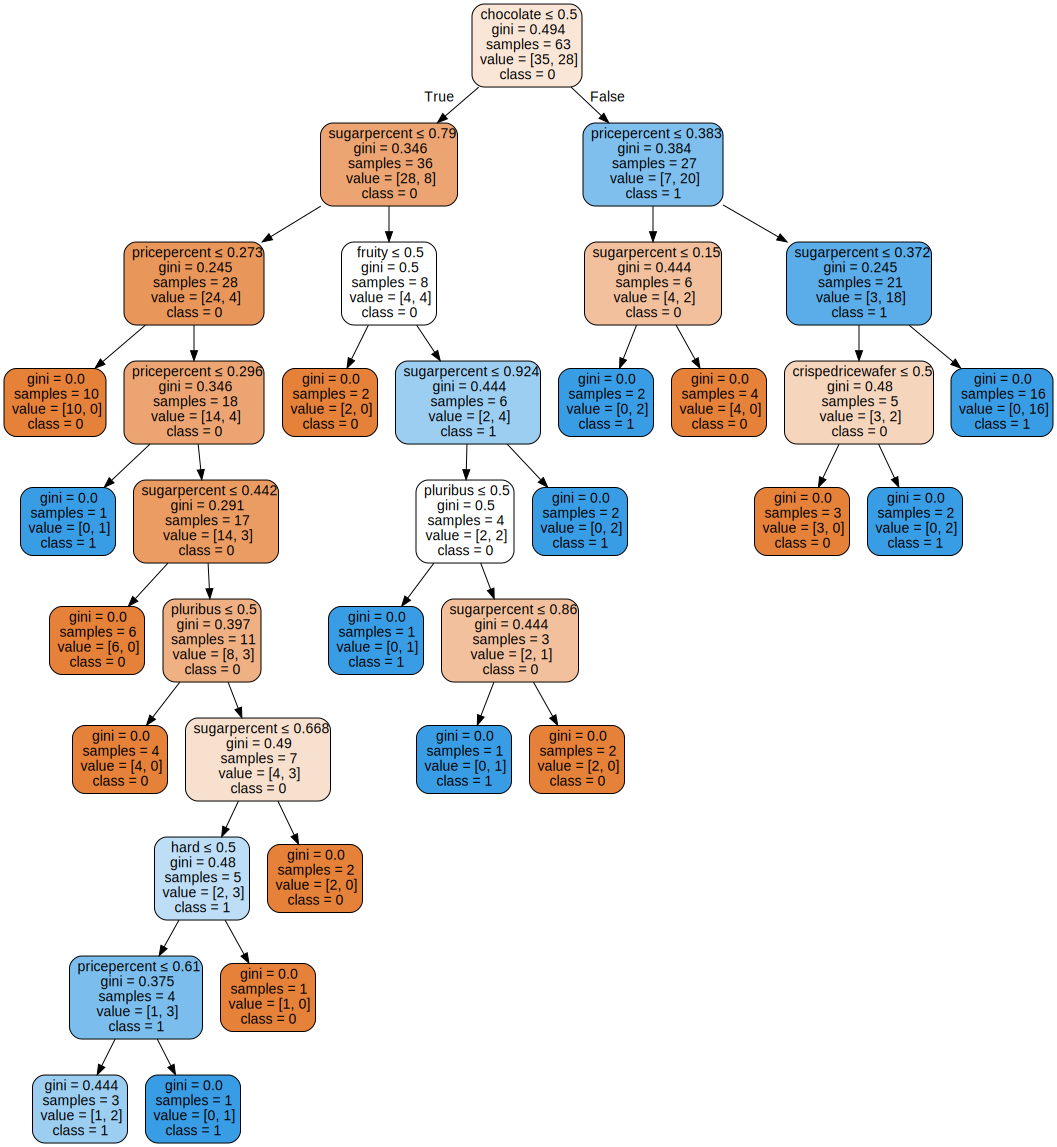

In [64]:
dot_data = tree.export_graphviz(decisionTree, out_file=None, feature_names=["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent"], class_names=['0','1'], filled=True, rounded=True, special_characters=True)

graphviz.Source(dot_data)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F.ej=Hud7vT9uozVaF5C">dot_data</variable><variable id="rrXqQ:9R(~X0,}F[1UD]">graphviz</variable><variable id="tkeU~z;dQ]^6[?rbF?)9">tree</variable><variable id="fYtGc,k9LOv^%_9|[cfE">decisionTree</variable></variables><block type="variables_set" id=":6*zm74#9$!O3?QVUukE" x="209" y="280"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field><value name="VALUE"><block type="varDoMethod" id="jsRyzb,9t~G^G@G@SMkS"><field name="VAR" id="tkeU~z;dQ]^6[?rbF?)9">tree</field><field name="MEMBER">export_graphviz</field><data>dot_data:</data><value name="INPUT"><block type="lists_create_with" id="r2_rY*ef1v:96w)e_B6K"><mutation items="7"></mutation><value name="ADD0"><block type="variables_get" id="x$]b$%X#}qjO@0H/!O|N"><field name="VAR" id="fYtGc,k9LOv^%_9|[cfE">decisionTree</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="K!=:ty3DMPs#b^ziH=5p"><field name="CODE">out_file=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="by]EM[Y$kMG~MfF0{q^,"><field name="CODE">feature_names=["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus","sugarpercent","pricepercent"]</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock" id="2hz~E.{8:W9-wWb*9Ut~"><field name="CODE">class_names=['0','1']</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock" id="^IJ3b3Eg7K9k^6Of_4i%"><field name="CODE">filled=True</field></block></value><value name="ADD5"><block type="dummyOutputCodeBlock" id="VH!NxdBRgItjnN]Zs^Uh"><field name="CODE">rounded=True</field></block></value><value name="ADD6"><block type="dummyOutputCodeBlock" id="f*|7fCy,K/0{_WzfribG"><field name="CODE">special_characters=True</field></block></value></block></value></block></value></block><block type="varCreateObject" id="-a(nDg:Sgtf)Ey5vB4(x" x="187" y="513"><field name="VAR" id="rrXqQ:9R(~X0,}F[1UD]">graphviz</field><field name="MEMBER">Source</field><data>graphviz:Source</data><value name="INPUT"><block type="variables_get" id="!M}@xBlLyRkl~Us)Smh%"><field name="VAR" id="F.ej=Hud7vT9uozVaF5C">dot_data</field></block></value></block></xml>

--------------

**QUESTION:**

Explain the tree - what are the first three important decisions it makes?

**ANSWER: (click here to edit)**

*It first looks at whether something is chocolate, and then looks at sugar percent if chocolate is 0 and price percent if chocolate is 1.
This suggests that taste might be the first factor consumers look at, but after that, it might be health and price.*

----------------------------

--------------

**QUESTION:**

Consider what the logistic regression model said were important features below. 
How does the decision tree compare?

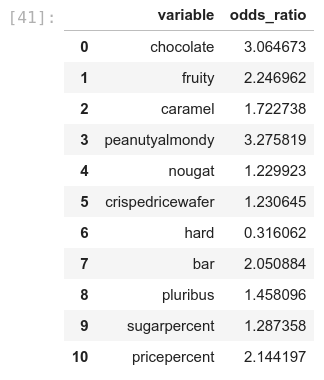

**ANSWER: (click here to edit)**

*They are very different.
It seems the decision tree is not giving the same importance to fruity, peanutalmondy, and bar*

----------------------------

**QUESTION:**

Which model (decision tree or logistic regression) do you think is more correct?
How would you know?

**ANSWER: (click here to edit)**

*Logistic regression because it had a better overall classification. I trust it more because it made more correct predictions.*

----------------------------

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
